In [22]:
# Load in necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter
import numpy as np

In [27]:
df = pd.read_csv('sports_data.csv') # Load in data
df['date_event'] = pd.to_datetime(df['date_event']) # Make sure date is datetime variable
df.set_index('date_event', inplace=True) # make date the index

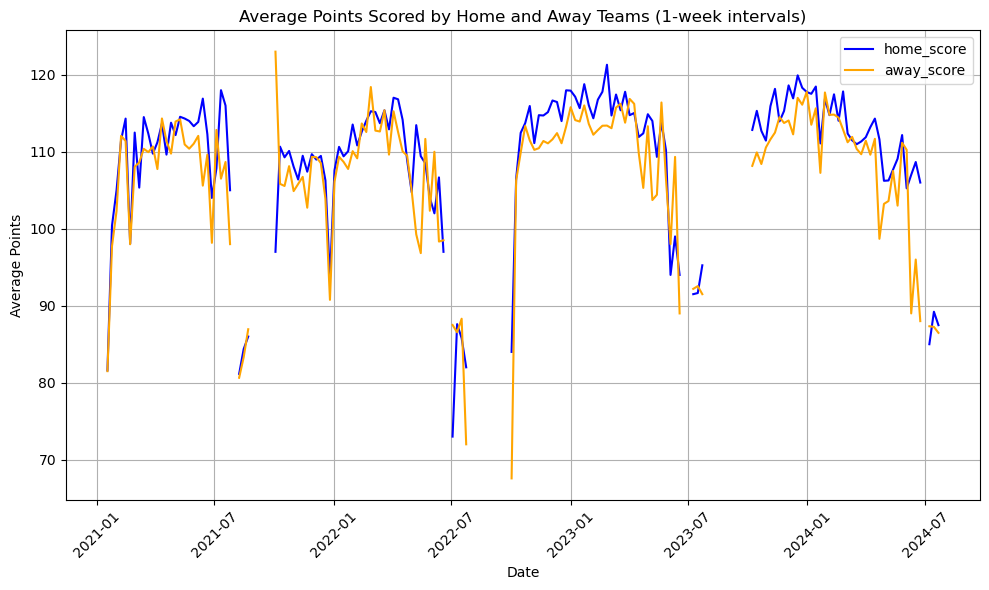

In [11]:
# Resample over 2-week windows and calculate the mean for both home and away scores, then make plot
df_resampled = df[['home_score', 'away_score']].resample('1W').mean()

plt.figure(figsize=(10, 6))
plt.plot(df_resampled.index, df_resampled['home_score'], label='home_score', color='blue')
plt.plot(df_resampled.index, df_resampled['away_score'], label='away_score', color='orange')

plt.title('Average Points Scored by Home and Away Teams (1-week intervals)')
plt.xlabel('Date')
plt.ylabel('Average Points')
plt.legend()
plt.grid(True)

# Format the date on the x-axis
date_format = DateFormatter("%Y-%m")
plt.gca().xaxis.set_major_formatter(date_format)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

/var/folders/5_/3_yrgngj7yd2wzz_f2vv29wm0000gn/T/ipykernel_31479/37964723.py:5: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_yearly_avg = df[['home_score', 'away_score']].resample('Y').mean()[:-1]


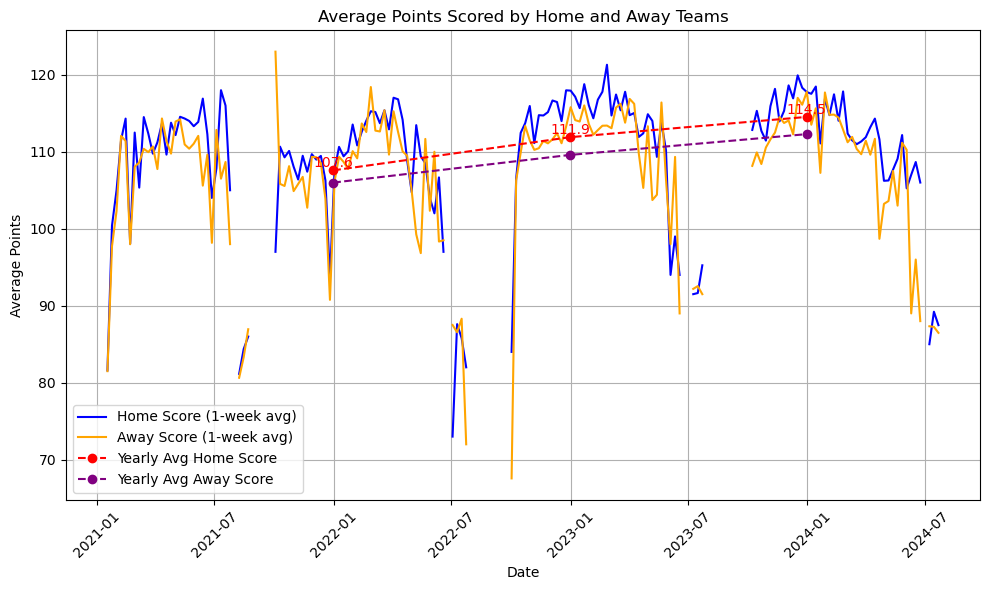

In [16]:
# Resample over 1-week windows and calculate the mean for both home and away scores
df_resampled = df[['home_score', 'away_score']].resample('1W').mean()

# Calculate yearly averages for both home and away scores, excluding the last year
df_yearly_avg = df[['home_score', 'away_score']].resample('Y').mean()[:-1]

# Plot the weekly average data
plt.figure(figsize=(10, 6))
plt.plot(df_resampled.index, df_resampled['home_score'], label='Home Score (1-week avg)', color='blue')
plt.plot(df_resampled.index, df_resampled['away_score'], label='Away Score (1-week avg)', color='orange')

# Plot the yearly averages as fluctuating lines, excluding the last year
plt.plot(df_yearly_avg.index, df_yearly_avg['home_score'], label='Yearly Avg Home Score', color='red', linestyle='--', marker='o')
plt.plot(df_yearly_avg.index, df_yearly_avg['away_score'], label='Yearly Avg Away Score', color='purple', linestyle='--', marker='o')

# Annotate the yearly average values for home team scores, excluding the last year
for i, avg in enumerate(df_yearly_avg['home_score']):
    plt.text(df_yearly_avg.index[i], avg, f'{avg:.1f}', color='red', ha='center', va='bottom')

# Add labels, title, and grid
plt.title('Average Points Scored by Home and Away Teams')
plt.xlabel('Date')
plt.ylabel('Average Points')
plt.legend()
plt.grid(True)

# Format the date on the x-axis
date_format = DateFormatter("%Y-%m")
plt.gca().xaxis.set_major_formatter(date_format)
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig("post2plot1.png", dpi=300)
plt.show()

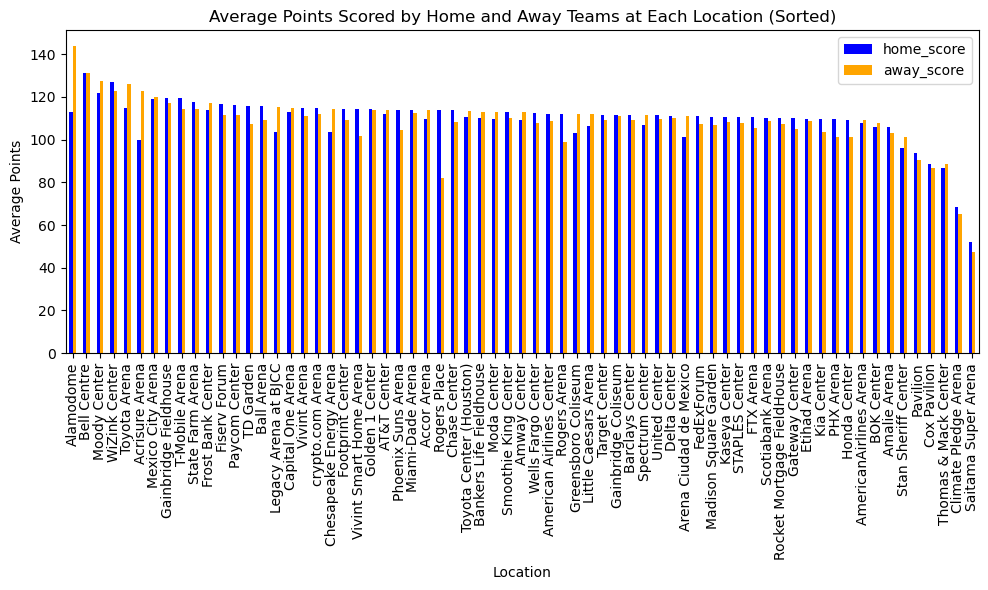

In [14]:
# Group by location and calculate the mean for both home and away scores
df_location = df.groupby('event_location')[['home_score', 'away_score']].mean()

# Add a new column 'max_score' which is the maximum of home and away scores at each location
df_location['max_score'] = df_location[['home_score', 'away_score']].max(axis=1)

# Sort the dataframe by the 'max_score' column in descending order
df_location_sorted = df_location.sort_values(by='max_score', ascending=False)

# Drop the 'max_score' column (since it's no longer needed for plotting)
df_location_sorted = df_location_sorted.drop(columns=['max_score'])

# Plot the sorted data
df_location_sorted.plot(kind='bar', figsize=(10, 6), color=['blue', 'orange'])

plt.title('Average Points Scored by Home and Away Teams at Each Location (Sorted)')
plt.xlabel('Location')
plt.ylabel('Average Points')
plt.xticks(rotation=90)

plt.tight_layout()

plt.show()

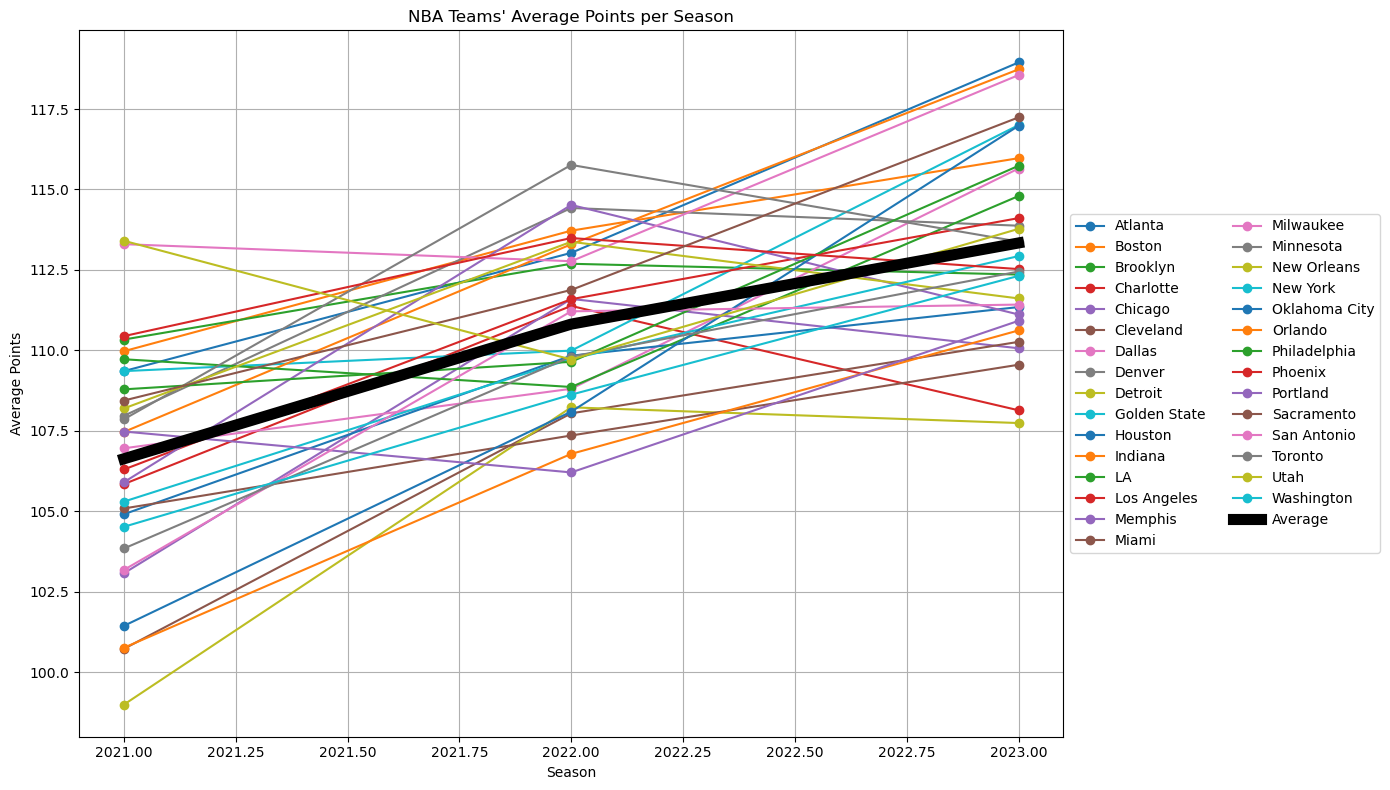

In [17]:
# Filter out non-NBA teams
df = df[~df['away_team'].isin(['Adelaide', 'RA\'ANANA', 'Cairns', 'Flamengo', 'New Zealand', 'Real', 'Team Giannis', 'China', 'Team Durant', 'Team LeBron', 'Western Conf', 'Eastern Conf'])]
df = df[~df['home_team'].isin(['Adelaide', 'RA\'ANANA', 'Cairns', 'Flamengo', 'New Zealand', 'Real', 'Team Giannis', 'China', 'Team Durant', 'Team LeBron', 'Western Conf', 'Eastern Conf'])]

# Ensure the index is in datetime format and extract the season year directly from the index
df.index = pd.to_datetime(df.index)
df['season'] = df.index.year

# Melt the dataframe to get a single column for 'team' and link scores with team type
df_melted = pd.melt(df, 
                    id_vars=['season', 'home_score', 'away_score'], 
                    value_vars=['home_team', 'away_team'], 
                    var_name='team_type', 
                    value_name='team')

# Link scores based on team type (home or away)
df_melted['score'] = df_melted.apply(
    lambda row: row['home_score'] if row['team_type'] == 'home_team' 
                else row['away_score'], axis=1)

# Group by season and team to calculate the average score
df_seasonal_avg = df_melted.groupby(['season', 'team'])['score'].mean().reset_index()

# Calculate overall average score for each season
overall_avg = df_seasonal_avg.groupby('season')['score'].mean().reset_index()
overall_avg['team'] = 'Average'  # Add a column to identify it in the plot

# Exclude the year 2024 from both df_seasonal_avg and overall_avg
df_seasonal_avg = df_seasonal_avg[df_seasonal_avg['season'] != 2024]
overall_avg = overall_avg[overall_avg['season'] != 2024]

# Plot each team's performance over seasons
plt.figure(figsize=(14, 8))
for team in df_seasonal_avg['team'].unique():
    team_data = df_seasonal_avg[df_seasonal_avg['team'] == team]
    plt.plot(team_data['season'], team_data['score'], label=team, marker='o')

# Plot the overall average score
plt.plot(overall_avg['season'], overall_avg['score'], label='Average', color='black', linewidth=8, linestyle='-')

# Customize the plot
plt.title("NBA Teams' Average Points per Season")
plt.xlabel("Season")
plt.ylabel("Average Points")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=2)  # Adjust legend placement
plt.grid(True)
plt.tight_layout()
plt.savefig("post2plot2.png", dpi=300)
plt.show()

In [18]:
# Make a team stats dataframe
team_stats = df_melted.groupby('team').agg(
    max_points=('score', 'max'),
    min_points=('score', 'min'),
    games_played=('score', 'count'),
    avg_points=('score', 'mean'),
    points_variance=('score', 'var')
).reset_index()

             team  max_points  min_points  games_played  avg_points  \
0         Atlanta         152           0           371  113.509434   
1          Boston         155          67           406  113.788177   
2        Brooklyn         150           0           355  110.904225   
3       Charlotte         158           0           344  107.473837   
4         Chicago         144           0           349  108.613181   
5       Cleveland         147           0           356  106.620787   
6          Dallas         148           0           383  110.130548   
7          Denver         147           0           390  111.643590   
8         Detroit         148           0           342  105.166667   
9    Golden State         157           0           388  111.886598   
10        Houston         147           0           339  109.421829   
11        Indiana         157           0           359  113.768802   
12             LA         175          66           364  111.195055   
13    

In [25]:
# Find Min and Max of variance
np.sqrt(team_stats.points_variance.min())
np.sqrt(team_stats.points_variance.max())


13.586014415204488